In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [3]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
mpl.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#plt.rc('text', usetex=True)
plt.rc('axes', unicode_minus=False)
width, height = plt.rcParams.get('figure.figsize')

In [4]:
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter
from scipy.stats import linregress
import seaborn as sns

In [5]:
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data.transpose(0, 2, 1)
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

In [7]:
Vx_600_10 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data#.data.transpose(0, 2, 1)
Vy_600_10 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data#.data.transpose(0, 2, 1)

In [8]:
Vx_600_01T = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data.transpose(0, 2, 1)
Vy_600_01T = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data.transpose(0, 2, 1)

In [9]:
Vx_600_01 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600_01 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [10]:
Vx_600_10T = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data.transpose(0, 2, 1)
Vy_600_10T = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data.transpose(0, 2, 1)

In [11]:
Vx0 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy0 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
#Vx0 = Vx0.transpose(0, 2, 1)
#Vy0 = Vy0.transpose(0, 2, 1)
Vx0 = Vx0/1E5
Vy0 = Vy0/1E5

In [12]:
Vx_10T = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_10T = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_10T = Vx_10T.transpose(0, 2, 1)
Vy_10T = Vy_10T.transpose(0, 2, 1)
Vx_10T = Vx_10T/1E5
Vy_10T = Vy_10T/1E5

In [13]:
Vx0_01 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vy from Velocities.fits as originally thought
Vy0_01 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vx from Velocities.fits as originally thought
#Vx0 = Vx0.transpose(0, 2, 1)
#Vy0 = Vy0.transpose(0, 2, 1)
Vx0_01 = Vx0_01/1E5
Vy0_01 = Vy0_01/1E5

In [14]:
Vx0_01T = fits.open("Velocities_TAU_1_0.fits")[0].data # Vy from Velocities.fits as originally thought
Vy0_01T = fits.open("Velocities_TAU_1_0.fits")[1].data # Vx from Velocities.fits as originally thought
Vx0_01T = Vx0_01T.transpose(0, 2, 1)
Vy0_01T = Vy0_01T.transpose(0, 2, 1)
Vx0_01T = Vx0_01T/1E5
Vy0_01T = Vy0_01T/1E5

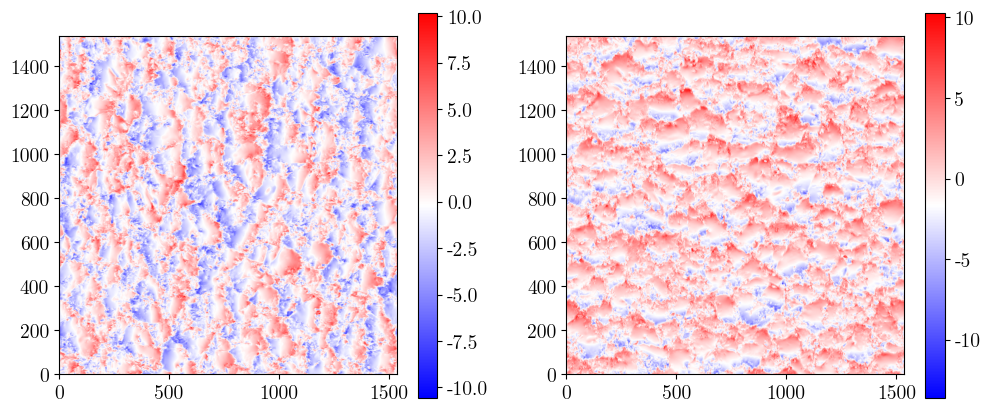

In [15]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.imshow(Vx0[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.imshow(Vy0[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()

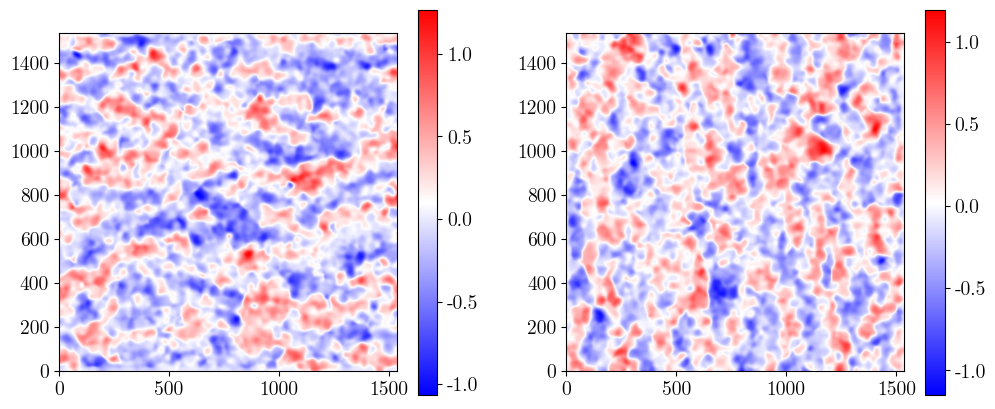

In [16]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.imshow(Vx_600_01[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.imshow(Vy_600_01[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()

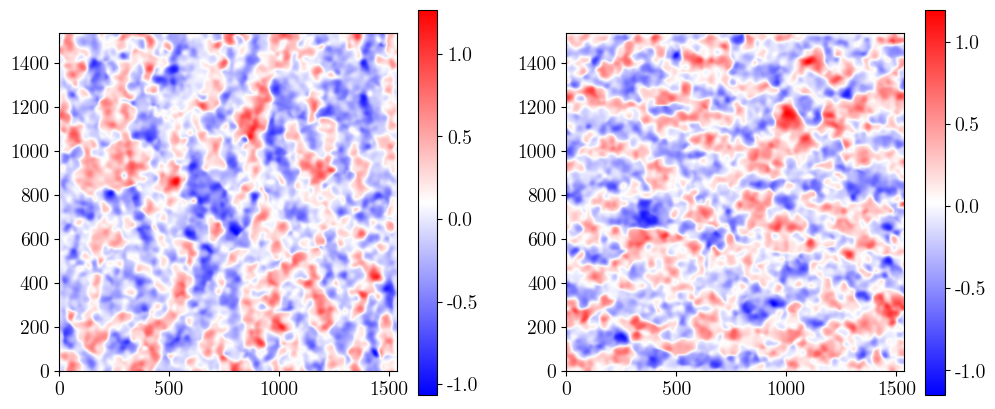

In [17]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.imshow(Vx_600_01T[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.imshow(Vy_600_01T[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()

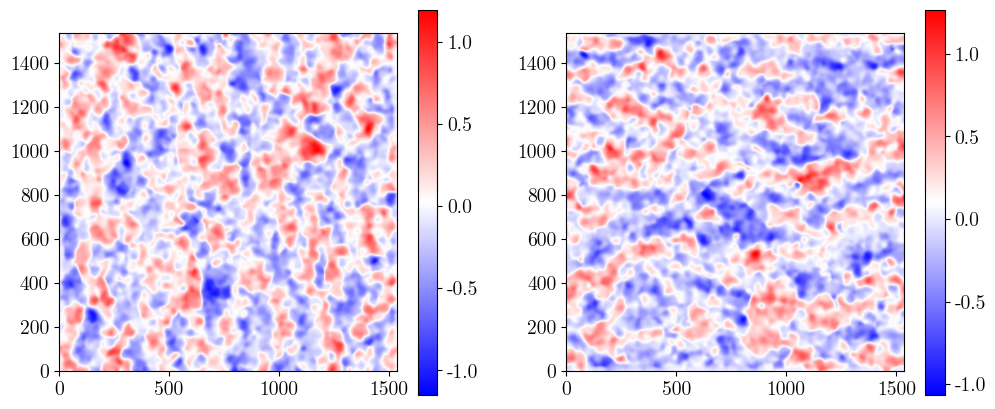

In [18]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.imshow(Vx_600_10[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.imshow(Vy_600_10[0].T, origin = "lower", cmap = "bwr")
plt.colorbar()

In [19]:
Vx_mean0 = temporal_avg(Vx0, 0, 90)
Vx_mean0 = Vx_mean0/1E5

Vy_mean0 = temporal_avg(Vy0, 0, 90)
Vy_mean0 = Vy_mean0/1E5

In [20]:
Vx_mean0_01 = temporal_avg(Vx0_01, 0, 90)
Vx_mean0_01 = Vx_mean0_01/1E5

Vy_mean0_01 = temporal_avg(Vy0_01, 0, 90)
Vy_mean0_01 = Vy_mean0_01/1E5

In [21]:
Vx_mean0_01T = temporal_avg(Vx0_01T, 0, 90)
Vx_mean0_01T = Vx_mean0_01T/1E5

Vy_mean0_01T = temporal_avg(Vy0_01T, 0, 90)
Vy_mean0_01T = Vy_mean0_01T/1E5

In [22]:
Vx_mean0_10T = temporal_avg(Vx_10T, 0, 90)
Vx_mean0_10T = Vx_mean0_10T/1E5

Vy_mean0_10T = temporal_avg(Vy_10T, 0, 90)
Vy_mean0_10T = Vy_mean0_10T/1E5

In [23]:
Vx_FLCT_600_01 = temporal_avg(Vx_600_01, 0, 90)
Vy_FLCT_600_01 = temporal_avg(Vy_600_01, 0, 90)

In [24]:
Vx_FLCT_600_01T = temporal_avg(Vx_600_01T, 0, 90)
Vy_FLCT_600_01T = temporal_avg(Vy_600_01T, 0, 90)

In [25]:
Vx_FLCT_600_10 = temporal_avg(Vx_600_10, 0, 90)
Vy_FLCT_600_10 = temporal_avg(Vy_600_10, 0, 90)

In [26]:
Vx_FLCT_600_10T = temporal_avg(Vx_600_10T, 0, 90)
Vy_FLCT_600_10T = temporal_avg(Vy_600_10T, 0, 90)

In [27]:
Vxm0_filtered = gaussian_filter(Vx_mean0, 22.5, mode = "wrap")
Vym0_filtered = gaussian_filter(Vy_mean0, 22.5, mode = "wrap")

In [28]:
Vxm0_01_filtered = gaussian_filter(Vx_mean0_01, 22.5, mode = "wrap")
Vym0_01_filtered = gaussian_filter(Vy_mean0_01, 22.5, mode = "wrap")

In [29]:
Vxm0_01T_filtered = gaussian_filter(Vx_mean0_01T, 22.5, mode = "wrap")
Vym0_01T_filtered = gaussian_filter(Vy_mean0_01T, 22.5, mode = "wrap")

In [30]:
Vxm0_10T_filtered = gaussian_filter(Vx_mean0_10T, 22.5, mode = "wrap")
Vym0_10T_filtered = gaussian_filter(Vy_mean0_10T, 22.5, mode = "wrap")

<h2>SIM Vx = [0], Vy = [1] ||||| Vx = [0], Vy = [1]</h2>

In [31]:
provera_01_01 = pearsonr(Vxm0_01_filtered.flatten(), Vx_FLCT_600_01.flatten())
print(provera_01_01)

PearsonRResult(statistic=np.float64(-0.0024881018332432426), pvalue=np.float64(0.00013251964771545259))


<h2>SIM Vx = [0], Vy = [1] ||||| Vx = [1], Vy = [0]</h2>

In [32]:
provera_01_10 = pearsonr(Vxm0_01_filtered.flatten(), Vx_FLCT_600_10.flatten())
print(provera_01_10)

PearsonRResult(statistic=np.float64(0.13595699987882032), pvalue=np.float64(0.0))


<h2>SIM Vx = [0], Vy = [1] ||||| Vx = [0], Vy = [1] TRANSPOSED</h2>

In [33]:
provera_01_01T = pearsonr(Vxm0_01_filtered.flatten(), Vx_FLCT_600_01T.flatten())
print(provera_01_01T)

PearsonRResult(statistic=np.float64(-0.05361971152791795), pvalue=np.float64(0.0))


<h2>SIM Vx = [0], Vy = [1] ||||| Vx = [1], Vy = [0] TRANSPOSED</h2>

In [34]:
provera_01_10T = pearsonr(Vxm0_01_filtered.flatten(), Vx_FLCT_600_10T.flatten())
print(provera_01_10T)

PearsonRResult(statistic=np.float64(0.9325966782350794), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] ||||| Vx = [0], Vy = [1]</h2>

In [35]:
provera_10_01 = pearsonr(Vxm0_filtered.flatten(), Vx_FLCT_600_01.flatten())
print(provera_10_01)

PearsonRResult(statistic=np.float64(0.21767159958615162), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] ||||| Vx = [1], Vy = [0]</h2>

In [36]:
provera_10_10 = pearsonr(Vxm0_filtered.flatten(), Vx_FLCT_600_10.flatten())
print(provera_10_10)

PearsonRResult(statistic=np.float64(-0.039543656894002), pvalue=np.float64(0.0))


<h2 style="color:green">SIM Vx = [1], Vy = [0] ||||| Vx = [0], Vy = [1] TRANSPOSED</h2>

In [37]:
provera_10_01T = pearsonr(Vxm0_filtered.flatten(), Vx_FLCT_600_01T.flatten())
print(provera_10_01T)

PearsonRResult(statistic=np.float64(0.9375096283311485), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] ||||| Vx = [1], Vy = [0] TRANSPOSED</h2>

In [38]:
provera_10_10T = pearsonr(Vxm0_filtered.flatten(), Vx_FLCT_600_10T.flatten())
print(provera_10_10T)

PearsonRResult(statistic=np.float64(-0.06673292258974009), pvalue=np.float64(0.0))


<h1>-----------------------------------------------------------------------------------------</h1>

<h2>SIM Vx = [0], Vy = [1] TRANSPOSED ||||| Vx = [0], Vy = [1]</h2>

In [39]:
provera_01T_01 = pearsonr(Vxm0_01T_filtered.flatten(), Vx_FLCT_600_01.flatten())
print(provera_01T_01)

PearsonRResult(statistic=np.float64(-0.053619711457276654), pvalue=np.float64(0.0))


<h2>SIM Vx = [0], Vy = [1] TRANSPOSED ||||| Vx = [1], Vy = [0]</h2>

In [40]:
provera_01T_10 = pearsonr(Vxm0_01T_filtered.flatten(), Vx_FLCT_600_10.flatten())
print(provera_01T_10)

PearsonRResult(statistic=np.float64(0.9325966782218955), pvalue=np.float64(0.0))


<h2>SIM Vx = [0], Vy = [1] TRANSPOSED ||||| Vx = [0], Vy = [1] TRANSPOSED</h2>

In [41]:
provera_01T_01T = pearsonr(Vxm0_01T_filtered.flatten(), Vx_FLCT_600_01T.flatten())
print(provera_01T_01T)

PearsonRResult(statistic=np.float64(-0.002488101829596137), pvalue=np.float64(0.00013251965072645674))


<h2>SIM Vx = [0], Vy = [1] TRANSPOSED ||||| Vx = [1], Vy = [0] TRANSPOSED</h2>

In [42]:
provera_01T_10T = pearsonr(Vxm0_10T_filtered.flatten(), Vx_FLCT_600_10T.flatten())
print(provera_01T_10T)

PearsonRResult(statistic=np.float64(-0.03954365690245685), pvalue=np.float64(0.0))


<h2 style = "color:darkgreen">SIM Vx = [1], Vy = [0] TRANSPOSED ||||| Vx = [0], Vy = [1] </h2>

In [43]:
provera_10T_01 = pearsonr(Vxm0_10T_filtered.flatten(), Vx_FLCT_600_01.flatten())
print(provera_01T_01)

PearsonRResult(statistic=np.float64(-0.053619711457276654), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] TRANSPOSED ||||| Vx = [1], Vy = [0] </h2>

In [44]:
provera_10T_10 = pearsonr(Vxm0_10T_filtered.flatten(), Vx_FLCT_600_10.flatten())
print(provera_10T_10)

PearsonRResult(statistic=np.float64(-0.06673292261997982), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] TRANSPOSED ||||| Vx = [0], Vy = [1] TRANSPOSED</h2>

In [45]:
provera_10T_01T = pearsonr(Vxm0_10T_filtered.flatten(), Vx_FLCT_600_01T.flatten())
print(provera_10T_01T)

PearsonRResult(statistic=np.float64(0.21767159954916407), pvalue=np.float64(0.0))


<h2>SIM Vx = [1], Vy = [0] TRANSPOSED ||||| Vx = [1], Vy = [0] TRANSPOSED</h2>

In [46]:
provera_10T_10T = pearsonr(Vxm0_10T_filtered.flatten(), Vx_FLCT_600_10T.flatten())
print(provera_10T_10T)

PearsonRResult(statistic=np.float64(-0.03954365690245685), pvalue=np.float64(0.0))


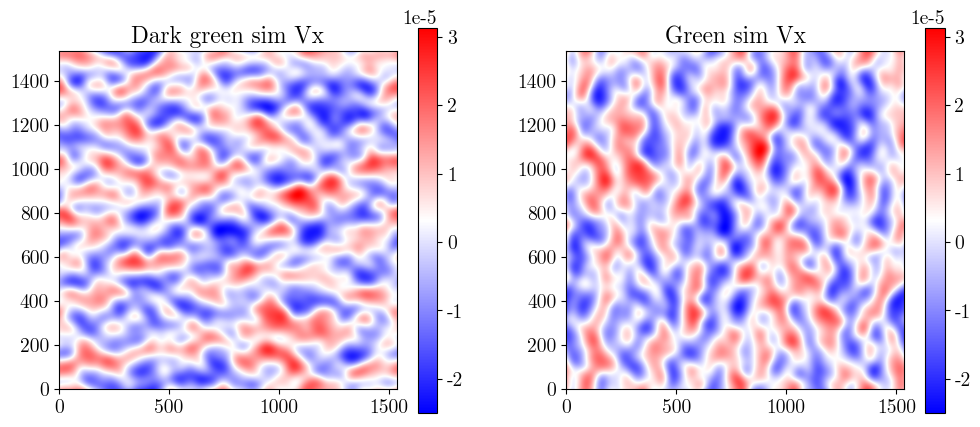

In [47]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.title("Dark green sim Vx")
plt.imshow(Vxm0_10T_filtered.T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.title("Green sim Vx")
plt.imshow(Vxm0_filtered.T, origin = "lower", cmap = "bwr")
plt.colorbar()

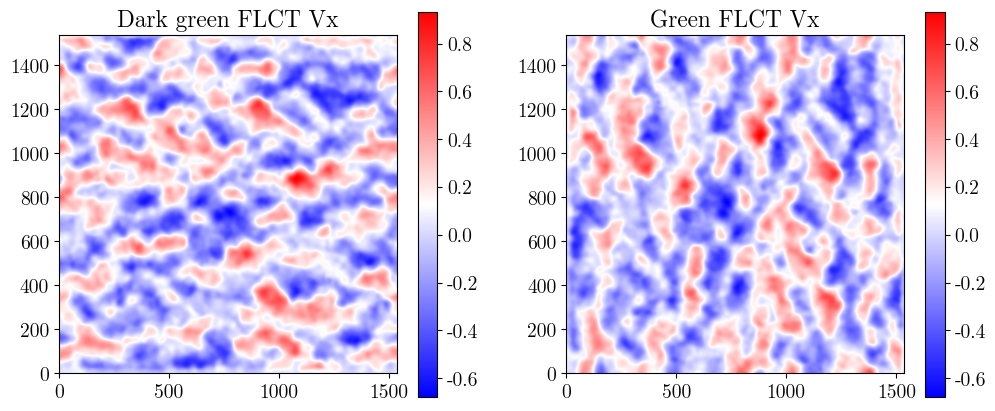

In [48]:
f = plt.figure(figsize = (12, 5))
plt.subplot(121)
plt.title("Dark green FLCT Vx")
plt.imshow(Vx_FLCT_600_01.T, origin = "lower", cmap = "bwr")
plt.colorbar()
plt.subplot(122)
plt.title("Green FLCT Vx")
plt.imshow(Vx_FLCT_600_01T.T, origin = "lower", cmap = "bwr")
plt.colorbar()